# Steepest Descent on Torch

In [6]:
"""We create the function and compute its gradient in a given point."""

import torch

# We use a tensor for the initial point (1.5,0)
x0 = torch.tensor([1.5], dtype=torch.float, requires_grad=True)
y0 = torch.tensor([0], dtype=torch.float, requires_grad=True)

f = 2*x0**3 - 6*x0*y0 + 3*y0**2

# We send the variables we need to use for our gradient i.e. two variables

f.backward()

print(f"Gradient is ({x0.grad.item()},{y0.grad}).")

Gradient is (13.5,tensor([-9.])).


In [9]:
""" We use a function and use the capabilities of torch to compute the gradient."""

x0 = torch.tensor([1.5], dtype=torch.float, requires_grad=True)
y0 = torch.tensor([0.5], dtype=torch.float, requires_grad=True)
print("Gradiente al inicio: ", x0.grad)

def fun(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

for it in range(3):
    f_val = fun(x0,y0) # We evaluate the function
    f_val.backward() # Compute the gradient
    print(f"Iteration {it}: {x0.item()}, {y0.item()}")
    print(f"Iteration {it}: The gradient ({x0.grad.item()}, {y0.grad.item()})")

# Notice that they get acumulated.

print("We need to make the gradients 0.")

Gradiente al inicio:  None
Iteration 0: 1.5, 0.5
Iteration 0: The gradient (10.5, -6.75)
Iteration 1: 1.5, 0.5
Iteration 1: The gradient (21.0, -13.5)
Iteration 2: 1.5, 0.5
Iteration 2: The gradient (31.5, -20.25)
We need to make the gradients 0.


In [8]:
""" Implementing the steepest descent with Torch."""

def steepest_descent(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    tuple
        a tuple holding the coordiantes of the "minimum" point as tensors.
    """
    # copy the values of x0, y0 in new variable tensors
    x = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    y = torch.tensor(y0, dtype=torch.float, requires_grad=True)
    print("Iteration \t f(x,y) \t x0 \t y0")
    for it in range(total_it):
        if x.grad:
            x.grad.data.zero_()
        if y.grad:
            y.grad.data.zero_()
        f_val = f(x,y)
        f_val.backward() # Compute the gradient
        with torch.no_grad(): # We don't need to comute latter a gradient on this operations
            x += -alpha*x.grad
            y += -alpha*y.grad
        print(f"{it+1} \t {f_val.item()} \t {x.item()} \t {y.item()}")
    return x.item(), y.item()


In [26]:
"""Testing the function."""

x0, y0 = -0.5, 1.5

steepest_descent(fun, x0, y0, 0.01, 18)

Iteration 	 f(x,y) 	 x0 	 y0
1 	 14.375 	 -0.42500001192092896 	 1.2675000429153442
2 	 9.187524795532227 	 -0.3597875237464905 	 1.097409963607788
3 	 6.240720748901367 	 -0.30170974135398865 	 0.9674349427223206
4 	 4.412734031677246 	 -0.2491253763437271 	 0.8650986552238464
5 	 3.204493284225464 	 -0.200943261384964 	 0.7827955484390259
6 	 2.3665757179260254 	 -0.1563982218503952 	 0.7155897617340088
7 	 1.7631440162658691 	 -0.11493046581745148 	 0.6601197123527527
8 	 1.3151283264160156 	 -0.07611583173274994 	 0.6140056848526001
9 	 0.973977267742157 	 -0.03962310776114464 	 0.5755084753036499
10 	 0.7085386514663696 	 -0.005186799913644791 	 0.5433222055435181
11 	 0.49807292222976685 	 0.02741091698408127 	 0.5164430737495422
12 	 0.3283310532569885 	 0.05835241824388504 	 0.4940835237503052
13 	 0.18925639986991882 	 0.08779312670230865 	 0.4756140112876892
14 	 0.07358357310295105 	 0.1158675104379654 	 0.4605228304862976
15 	 -0.02404192090034485 	 0.14269337058067322 	 0.

Iteration 	 f(x,y) 	 x0 	 y0
last tol: [[2.24645779e-05 1.96693835e-05]]


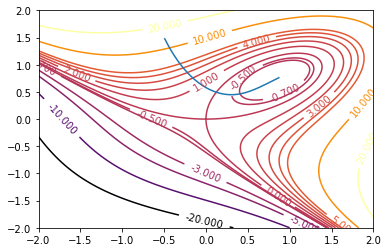

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def steepest_descent_sequence(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    numpy
        an array with tuples of the points of the algorithm as rows.
    """
    # copy the values of x0, y0 in new variable tensors
    x = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    y = torch.tensor(y0, dtype=torch.float, requires_grad=True)
    print("Iteration \t f(x,y) \t x0 \t y0")
    data = np.zeros((total_it, 2))
    for it in range(total_it):
        if x.grad:
            x.grad.data.zero_()
        if y.grad:
            y.grad.data.zero_()
        f_val = f(x,y)
        f_val.backward() # Compute the gradient
        with torch.no_grad(): # We don't need to comute latter a gradient on this operations
            x += -alpha*x.grad
            y += -alpha*y.grad
        data[it,:] = [x.item(), y.item()]
    print(f"last tol: {(data[-1:] - data[-2,:])/data[-1,]}")
    return data

def f(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

curve = steepest_descent_sequence(fun, x0, y0, 0.001, 1200)

x = np.linspace(-2, 2, 1500)
y = np.linspace(-2, 2, 1500)

X, Y = np.meshgrid(x,y)
Z = f(X, Y)

fig, ax = plt.subplots()
contours = ax.contour(X, Y, Z, cmap='inferno',
                     levels=[-20, -10,-5, -3, -0.7, -0.5, 0, 1, 2, 3, 4, 5, 10, 20])
contours.levels = [val for val in contours.levels]
ax.clabel(contours, contours.levels, inline=True, fontsize=10)
ax.plot(curve[:,0], curve[:,1])

# Steepest Descent in TensorFlow

In [22]:
"""We create the function and compute its gradient in a given point."""
import tensorflow as tf

# We use a variable for the initial point (1.5,0)
x0 = tf.Variable([1.5])
y0 = tf.Variable([0.0])

# We create the computational graph for the given function.
with tf.GradientTape() as tp:
    f = 2*x0**3 - 6*x0*y0 + 3*y0**2

df = tp.gradient(f, [x0, y0])
print(f"graf f({x0.numpy()[0]},{y0.numpy()[0]}) = ({df[0][0]},{df[1][0]})")

graf f(1.5,0.0) = (13.5,-9.0)


In [23]:
"""We don't have the percistency here."""

x0 = tf.Variable([1.5])
y0 = tf.Variable([0.0])

def fun(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

for it in range(3):
    with tf.GradientTape() as tp:
        f = 2*x0**3 - 6*x0*y0 + 3*y0**2
    df = tp.gradient(f, [x0,y0])
    print(f"graf f({x0.numpy()[0]},{y0.numpy()[0]}) = ({df[0][0]},{df[1][0]})")

graf f(1.5,0.0) = (13.5,-9.0)
graf f(1.5,0.0) = (13.5,-9.0)
graf f(1.5,0.0) = (13.5,-9.0)


In [24]:
""" Implementing the steepest descent with Torch. """

def steepest_descent(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    tuple
        a tuple holding the coordiantes of the "minimum" point as tensors.
    """
    # copy the values of x0, y0 in new variable.
    x = tf.Variable(x0)
    y = tf.Variable(y0)
    print("Iteration \t f(x,y) \t x0 \t y0")
    for it in range(total_it):
        with tf.GradientTape() as tp:
            f_val = f(x,y)
        dx, dy = tp.gradient(f_val, [x,y])
        x.assign(x-alpha*dx)
        y.assign(y-alpha*dy)
        print(f"{it+1} \t {f_val.numpy()} \t {x.numpy()} \t {y.numpy()}")
        


In [27]:
"""Testing the function."""

x0, y0 = -1.5, 2.0

steepest_descent(fun, x0, y0, 0.01, 18)

Iteration 	 f(x,y) 	 x0 	 y0
1 	 35.25 	 -1.5149999856948853 	 1.5499999523162842
2 	 18.306591033935547 	 -1.5597134828567505 	 1.2428749799728394
3 	 9.80227279663086 	 -1.6311033964157104 	 1.0102657079696655
4 	 4.301334381103516 	 -1.7301173210144043 	 0.8205422163009644
5 	 -0.18234765529632568 	 -1.860483169555664 	 0.6561391353607178
6 	 -4.707888603210449 	 -2.0287985801696777 	 0.5057634711265564
7 	 -10.156495094299316 	 -2.2454142570495605 	 0.36101382970809937
8 	 -17.6373348236084 	 -2.526266574859619 	 0.21455919742584229
9 	 -28.963544845581055 	 -2.8963143825531006 	 0.05883999168872833
10 	 -47.56913375854492 	 -3.3961021900177 	 -0.11525045335292816
11 	 -80.69096374511719 	 -4.095027923583984 	 -0.3202120065689087
12 	 -145.30728149414062 	 -5.120395660400391 	 -0.5751419067382812
13 	 -286.7381591796875 	 -6.728011131286621 	 -0.9121365547180176
14 	 -648.199951171875 	 -9.498706817626953 	 -1.3906965255737305
15 	 -1801.377685546875 	 -14.995674133300781 	 -2.1346

In [84]:
"""Second test for function."""

def fun(x,y):
    return x*y*tf.math.exp(-(x**2+y**2)/2.0)

x0,y0 = 0.5, 0.5

steepest_descent(fun, x0, y0, 0.1, 30)

Iteration 	 f(x,y) 	 x0 	 y0
1 	 0.1947001963853836 	 0.4707949757575989 	 0.4707949757575989
2 	 0.1775837242603302 	 0.4414355456829071 	 0.4414355456829071
3 	 0.1603635549545288 	 0.4121868312358856 	 0.4121868312358856
4 	 0.14335158467292786 	 0.3833172917366028 	 0.3833172917366028
5 	 0.12685424089431763 	 0.3550860285758972 	 0.3550860285758972
6 	 0.11114979535341263 	 0.32773059606552124 	 0.32773059606552124
7 	 0.0964689552783966 	 0.3014567494392395 	 0.3014567494392395
8 	 0.08298182487487793 	 0.2764313519001007 	 0.2764313519001007
9 	 0.07079267501831055 	 0.2527787983417511 	 0.2527787983417511
10 	 0.059941984713077545 	 0.23058079183101654 	 0.23058079183101654
11 	 0.0504145510494709 	 0.2098791003227234 	 0.2098791003227234
12 	 0.042151015251874924 	 0.19068028032779694 	 0.19068028032779694
13 	 0.03506074100732803 	 0.17296163737773895 	 0.17296163737773895
14 	 0.029034029692411423 	 0.15667741000652313 	 0.15667741000652313
15 	 0.023952553048729897 	 0.1417